# Nonlinear Dimensionality Reduction (Manifold learning)

In [2]:
%matplotlib inline

In [8]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
from sklearn import preprocessing
from sklearn.metrics import euclidean_distances
from math import log

In [4]:
sns.set(style='white')

Načtení dat a rovnoměrně náhodný výber podmnožiny vstupů. Metody nelinéární redukce dimenze vyžadují velké množstní paměti a není prakticky možné napočítat projektci pro všechny vstupy. 

In [33]:
d1 = pd.read_csv('data/data1.csv', sep=';', header=None)

n = 13  # number of inputs
input_indices = list(range(n))
samples = 5000 # number of samples from whole dataset

y = d1[n]
d1_notscaled = d1[input_indices]
d1 = pd.DataFrame(preprocessing.scale(d1[input_indices])) # normalization across whole dataset
d1[n] = y

d1_subset = d1.sample(samples) # sample smaller subset
d1_notscaled = d1_notscaled.iloc[d1_subset.index]
y_notscaled = y.iloc[d1_subset.index]
print('rows, columns:', d1_subset.shape)
d1_subset.head()

rows, columns: (5000, 14)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
36771,-0.935891,-0.196550,0.373232,1.603494,1.037090,1.120853,0.272845,0.353474,1.450173,1.021676,0.872238,0.148891,-1.884616,2.2204
39305,1.227538,0.889048,0.910099,0.077021,-0.401476,0.810154,0.009259,0.601913,0.164955,-0.436831,0.457059,-0.548538,0.978283,2.3152
32493,-0.605049,-0.915135,-0.211924,1.168261,-0.545282,-1.144399,0.249409,-0.573739,1.268712,-0.754423,-0.769518,0.424801,-0.627158,1.1520
6395,-0.212596,-0.903258,0.719781,1.172050,-1.689596,0.236834,0.687525,0.494018,1.108248,-1.470443,-0.123053,0.453860,-1.395456,7.0865
32328,-0.603056,-0.938415,-0.330659,1.313507,-0.637236,-1.169284,0.323578,-0.561302,1.275611,-0.647120,-0.799851,0.352308,-0.626623,1.2619


In [34]:
x = d1_subset[input_indices]
# x = pd.DataFrame(preprocessing.scale(x)) # normalization across subset
x.index = d1_subset.index
y = d1_subset[n]

In [7]:
print(y.describe())

count    5000.000000
mean        5.267620
std        28.861722
min         0.079800
25%         0.919550
50%         2.458550
75%         4.341850
max      1055.270000
Name: 13, dtype: float64


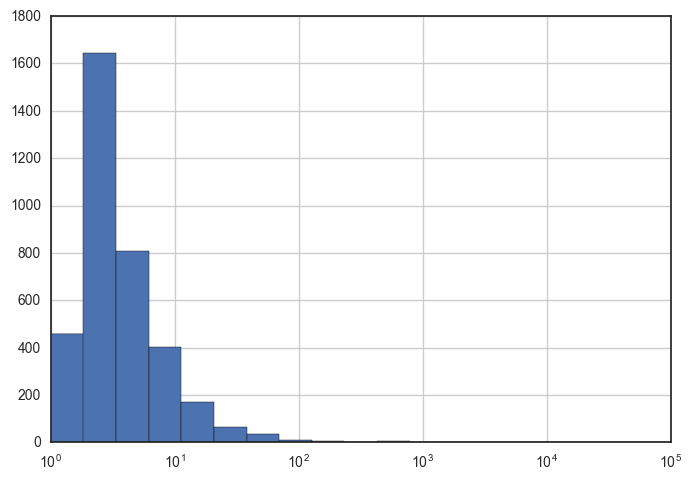

In [7]:
y.hist(bins=np.logspace(0, 5, 20))
plt.gca().set_xscale('log')

Metody nelineární reukde dimenze pracují se vzdáleností bodů ve vstupní vícerozměnném prostoru. Jednotlivé složky vstupu je potřena normalizovat, aby vzdálenost bodů v jedné dimenzi nepřebila vzdálenosti ve všech ostatních dimenzích.

[(-5.7921279131417478, 5.0919822231552017),

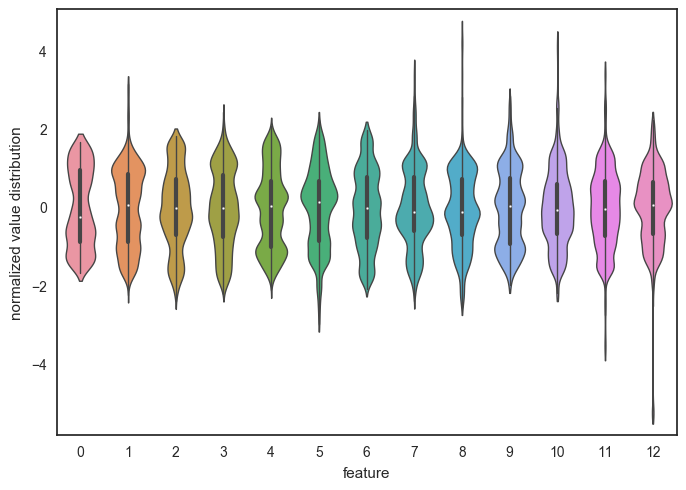

In [8]:
grid = sns.violinplot(data=x, bw=.2, cut=1, linewidth=1)
grid.set(ylim=(min(x.min())-0.5, max(x.max())+0.5), xlabel='feature', ylabel='normalized value distribution')

## Isomap

Metoda nelineární redikce dimenze založená na nejkratších vzdálenostech sousedů. Pro každý bod se nalezne jeho K nejbližších sousedů ve vstupním prostoru. Následně se spočítají nekratší cesty mezi těmito body. Samotná nízkodimenzionální projekce se pak snaží zachovat pomery mezi (euklidovskými) vzdálenost bodů ve vstupním prostoru.

In [9]:
isomap = Isomap(n_components=2, eigen_solver='dense', n_jobs=-1)
x_reduced_isomap = pd.DataFrame(isomap.fit_transform(x))

In [10]:
print('rows, columns:', x_reduced_isomap.shape)
x_reduced_isomap.head()

rows, columns: (5000, 2)


,0,1
0,-0.027788,-0.005168
1,-0.027788,-0.005168
2,-0.027729,-0.005153
3,-0.027777,-0.005165
4,-0.027774,-0.005165


In [11]:
x_reduced_isomap.index = x.index
d_isomap = pd.concat([x_reduced_isomap, y, x], axis=1)
d_isomap.columns = ['x1', 'x2', 'y'] + ['f{}'.format(i) for i in x.columns]
d_isomap.head()

,x1,x2,y,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12
39191,-0.027788,-0.005168,1.9724,-0.003743,-0.211041,-1.135107,-1.443137,-1.442342,-1.230409,-1.745962,-0.546999,-1.079472,-1.227934,-1.418195,-1.505004,-0.229347
39185,-0.027788,-0.005168,1.9731,-0.003648,-0.211041,-1.134823,-1.443137,-1.442342,-1.230409,-1.745686,-0.546999,-1.079472,-1.227934,-1.418195,-1.504691,-0.229347
35248,-0.027729,-0.005153,1.0324,-0.463979,0.075443,0.283471,-0.285210,1.269018,0.028332,-1.671242,0.039739,-0.146077,0.969320,-0.202676,-1.540312,-1.191862
31,-0.027777,-0.005165,4.0223,1.398797,1.152964,-0.532339,1.120267,1.057013,-1.281629,0.071020,-0.525855,1.048561,0.731413,-2.128169,-0.052339,-0.679396
3805,-0.027774,-0.005165,1.5814,-0.511540,-1.620418,-0.312764,-0.363264,-0.229063,-0.508988,-0.968437,-0.328410,0.433696,-0.271706,-0.754036,-0.885691,0.818623


### Scatter Plot

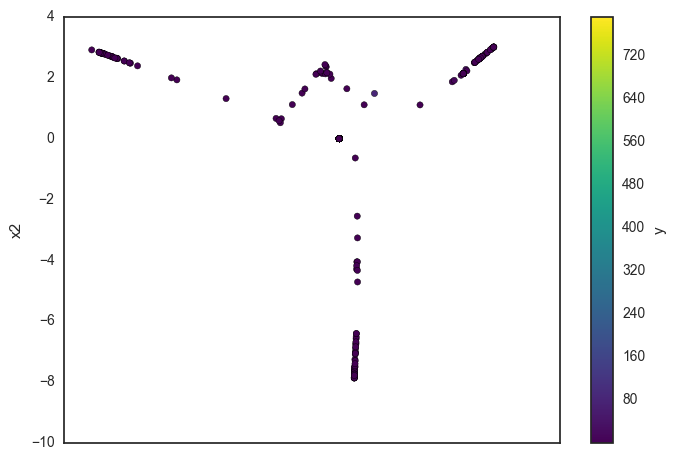

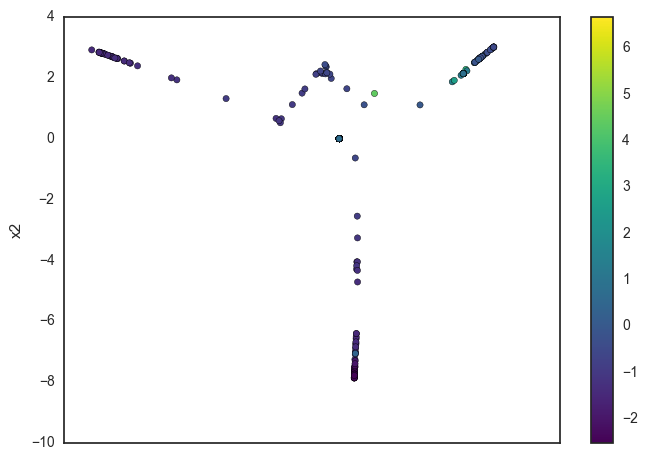

In [12]:
d_isomap.plot.scatter(x='x1', y='x2', c='y', cmap='viridis')
d_isomap.plot.scatter(x='x1', y='x2', c=d_isomap['y'].apply(log), cmap='viridis')

Níže je vizualizace závislosti hodnot featury (barva) na pozici v projekci pomocí Isomap.

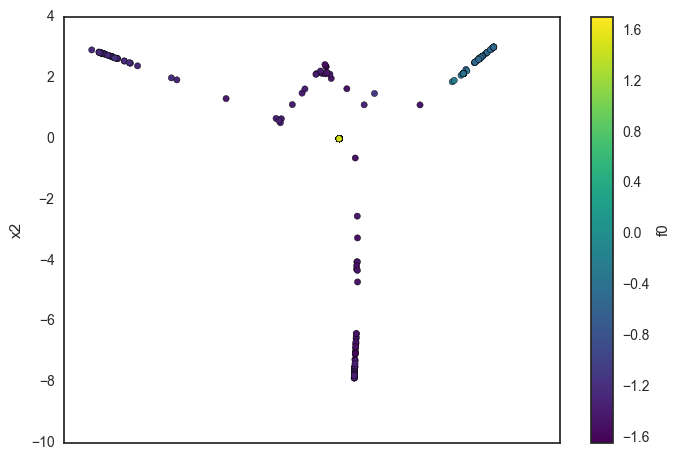

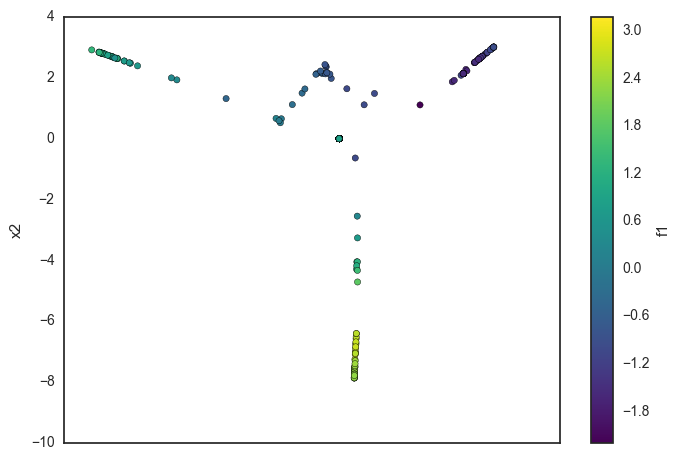

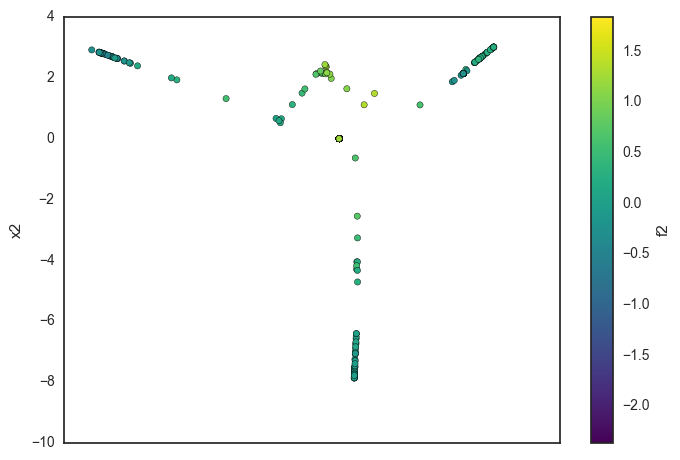

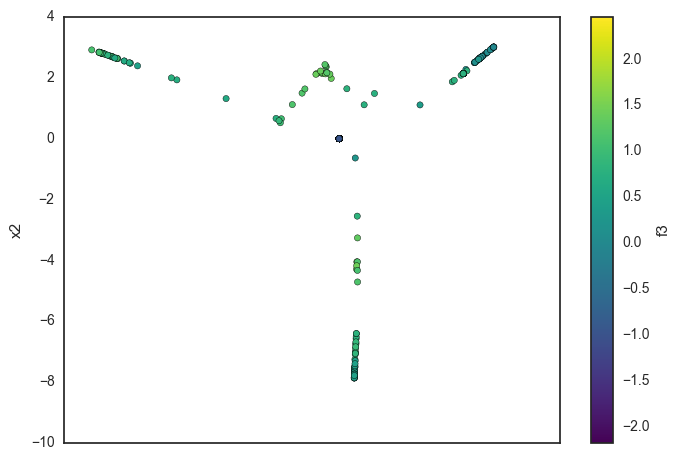

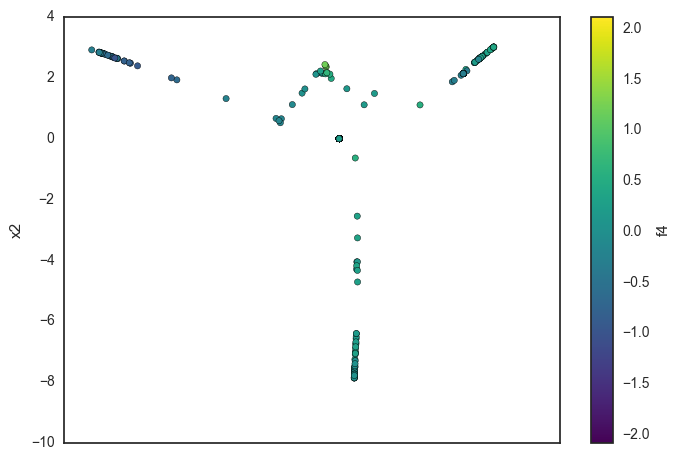

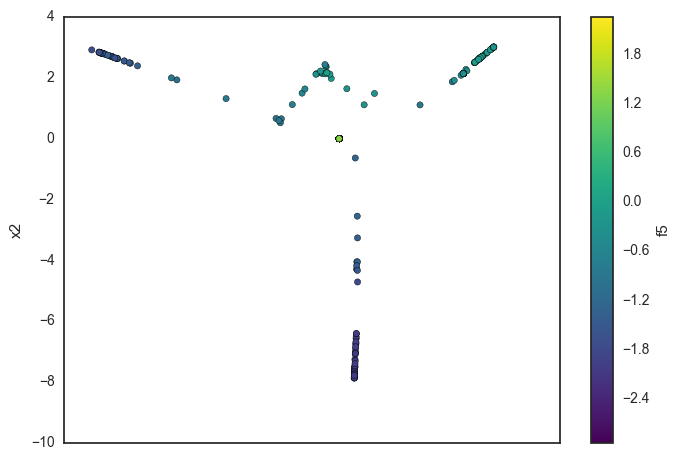

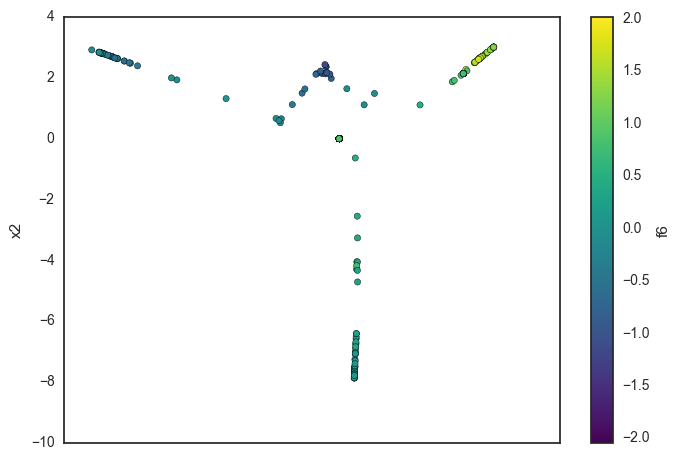

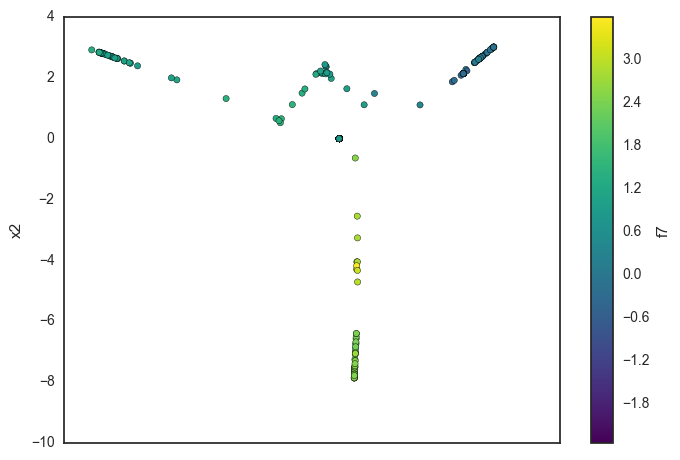

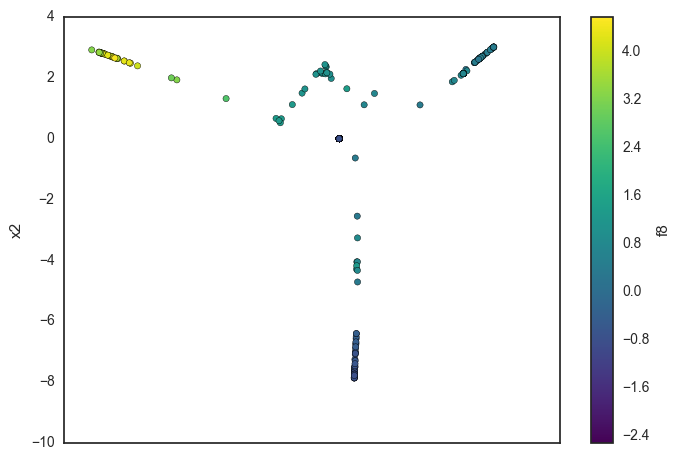

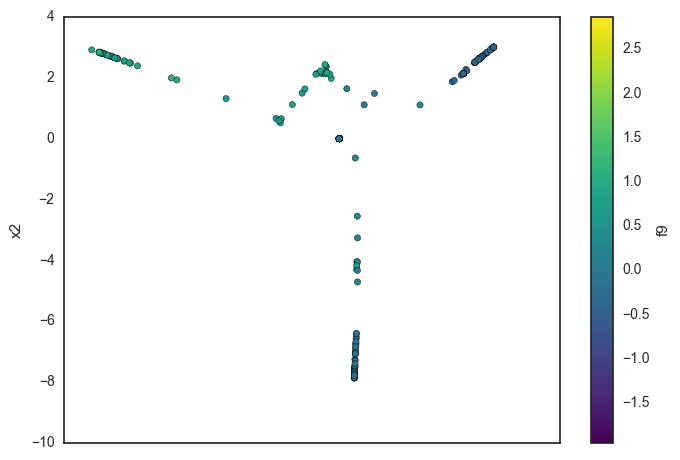

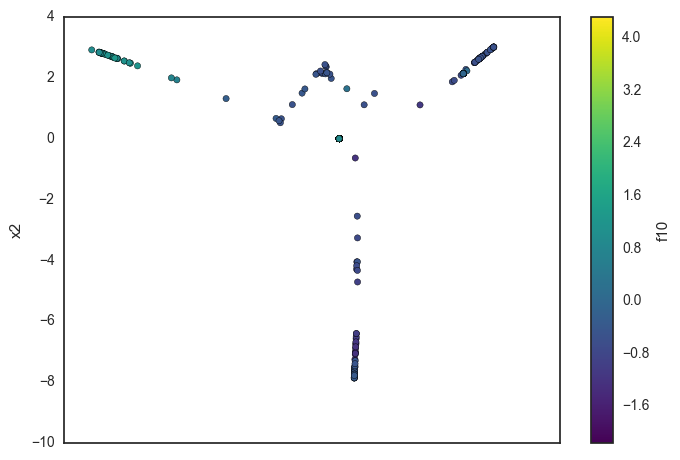

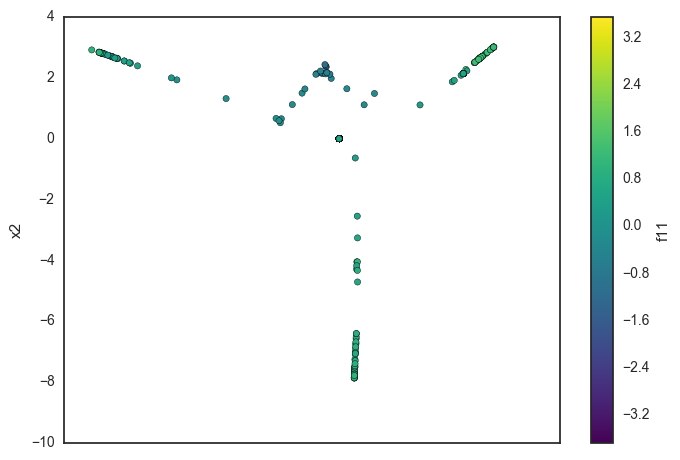

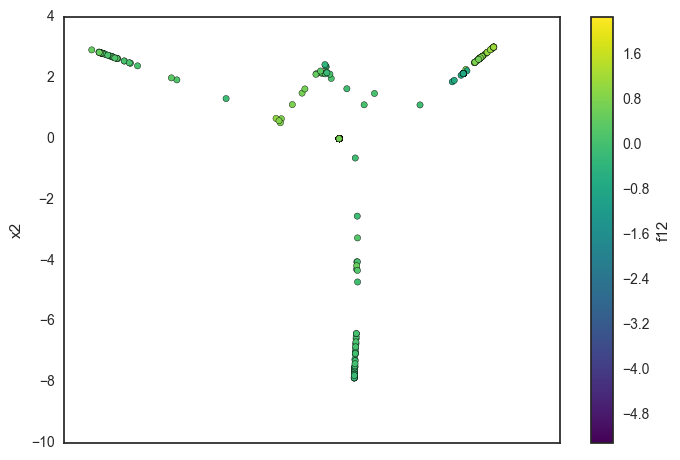

In [13]:
for i in x.columns:
    d_isomap.plot.scatter(x='x1', y='x2', c='f{}'.format(i), cmap='viridis')

### Hexbin Plot

<function __main__.plot_hexbin>

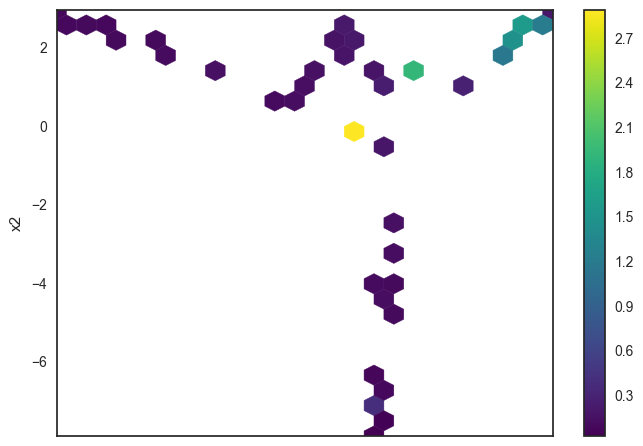

In [14]:
def plot_hexbin(gridsize, logscale, maximum):
    d_isomap.plot.hexbin(x='x1', y='x2', C='y',
                         bins='log' if logscale else None,
                         gridsize=gridsize,
                         reduce_C_function=np.max if maximum else np.mean,
                         cmap='viridis')

gridsize = widgets.IntSlider(min=10, max=100, step=5, value=25, description='grid size')
widgets.interact(plot_hexbin, gridsize=gridsize, logscale=True, maximum=True)
# assumes we are intersted in maximization

## t-SNE

Metoda t-SNE je založená na zachování lokální struktury dat za pomoci převodu na podmíněnou pravdepodobnost. Samotná projekce se snaží oddělit shluky podobných bodů skrze iterativní optimalizaci Kullback–Leibler divergence metodou gradientního sestupu.

In [15]:
tsne = TSNE(n_components=2)
x_reduced_tsne = pd.DataFrame(tsne.fit_transform(x))

In [16]:
print('rows, columns:', x_reduced_tsne.shape)
x_reduced_tsne.head()

rows, columns: (5000, 2)


,0,1
0,-6.710904,-13.030400
1,-6.721122,-13.030716
2,3.564530,-0.419086
3,-6.617712,-9.765271
4,13.506326,-6.605058


In [17]:
x_reduced_tsne.index = x.index
d_tsne = pd.concat([x_reduced_tsne, y, x], axis=1)
d_tsne.columns = ['x1', 'x2', 'y'] + ['f{}'.format(i) for i in x.columns]
d_tsne.head()

,x1,x2,y,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12
39191,-6.710904,-13.030400,1.9724,-0.003743,-0.211041,-1.135107,-1.443137,-1.442342,-1.230409,-1.745962,-0.546999,-1.079472,-1.227934,-1.418195,-1.505004,-0.229347
39185,-6.721122,-13.030716,1.9731,-0.003648,-0.211041,-1.134823,-1.443137,-1.442342,-1.230409,-1.745686,-0.546999,-1.079472,-1.227934,-1.418195,-1.504691,-0.229347
35248,3.564530,-0.419086,1.0324,-0.463979,0.075443,0.283471,-0.285210,1.269018,0.028332,-1.671242,0.039739,-0.146077,0.969320,-0.202676,-1.540312,-1.191862
31,-6.617712,-9.765271,4.0223,1.398797,1.152964,-0.532339,1.120267,1.057013,-1.281629,0.071020,-0.525855,1.048561,0.731413,-2.128169,-0.052339,-0.679396
3805,13.506326,-6.605058,1.5814,-0.511540,-1.620418,-0.312764,-0.363264,-0.229063,-0.508988,-0.968437,-0.328410,0.433696,-0.271706,-0.754036,-0.885691,0.818623


### Scater plot

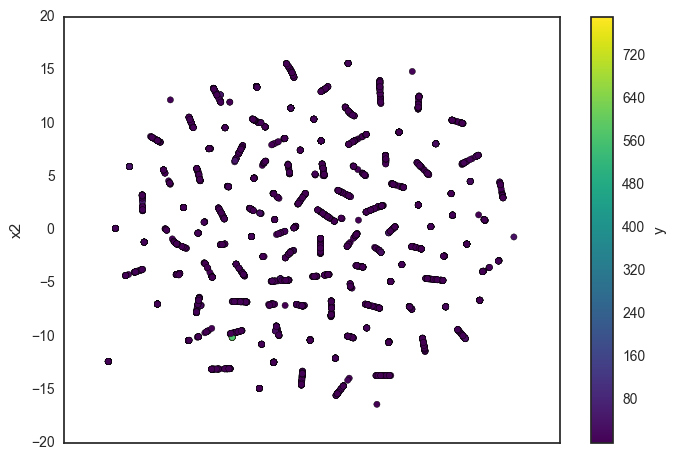

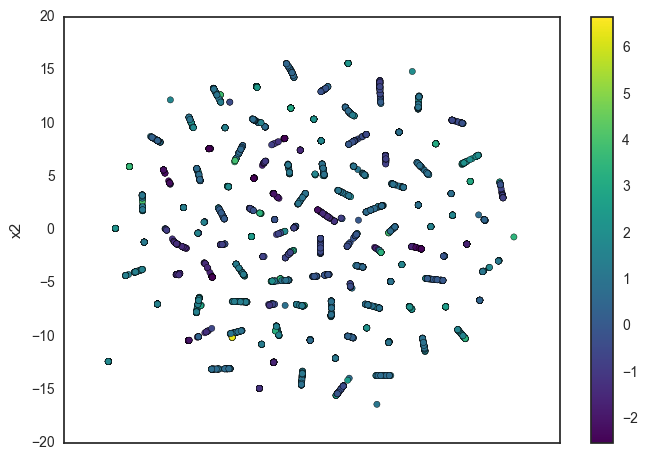

In [18]:
d_tsne.plot.scatter(x='x1', y='x2', c='y', cmap='viridis')
d_tsne.plot.scatter(x='x1', y='x2', c=d_tsne['y'].apply(log), cmap='viridis')

Níže je vizualizace závislosti hodnot featury (barva) na pozici v projekci pomocí Isomap.

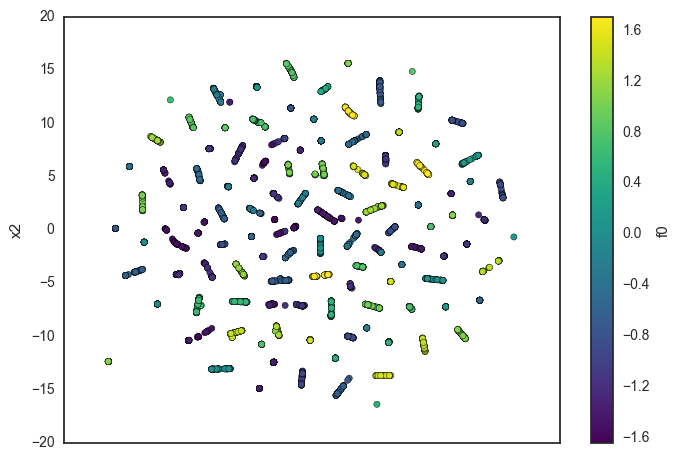

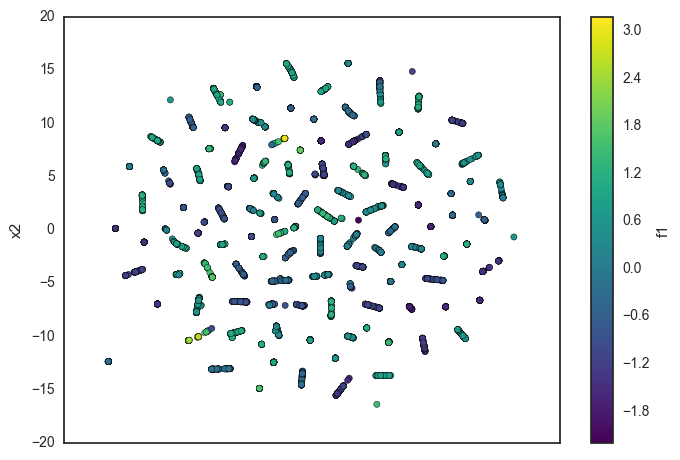

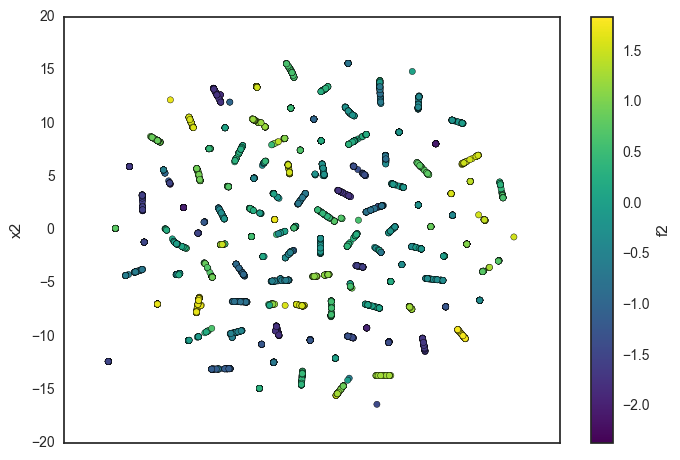

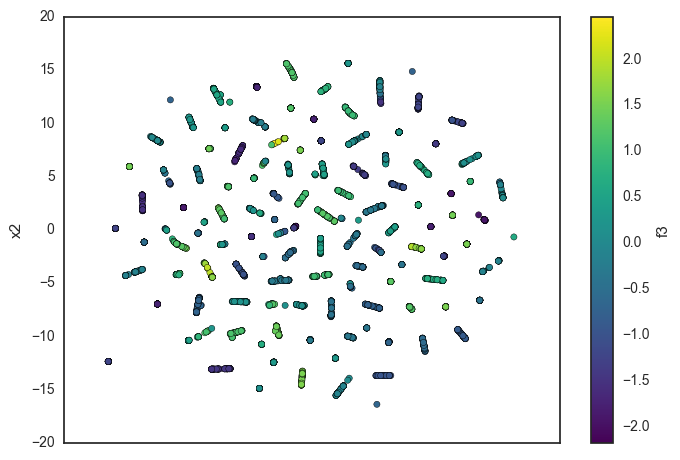

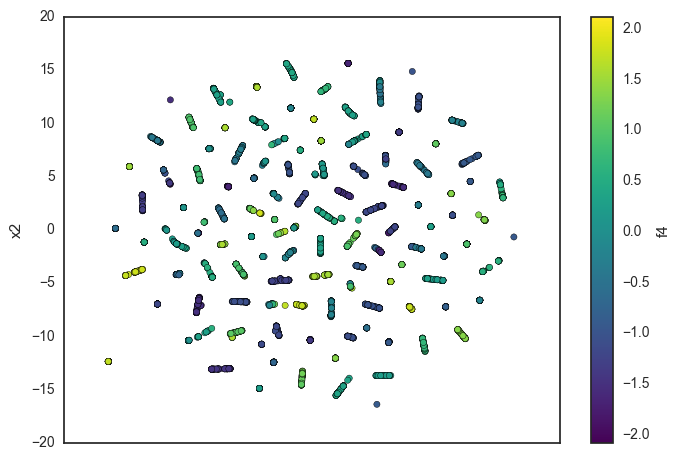

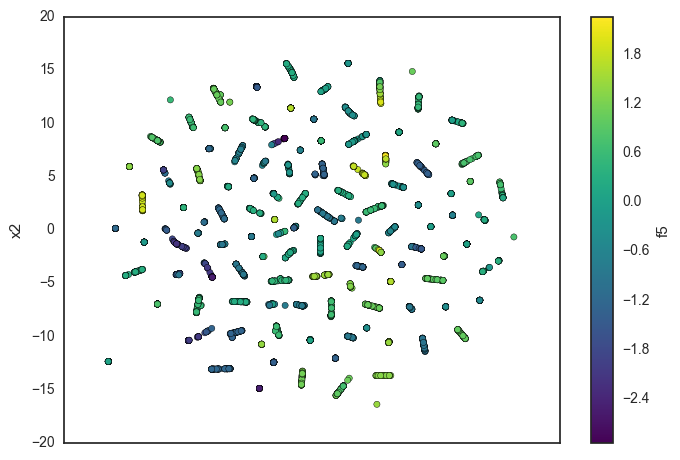

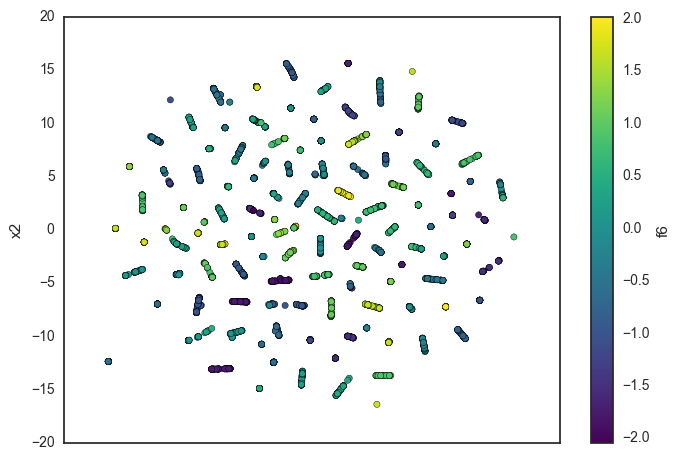

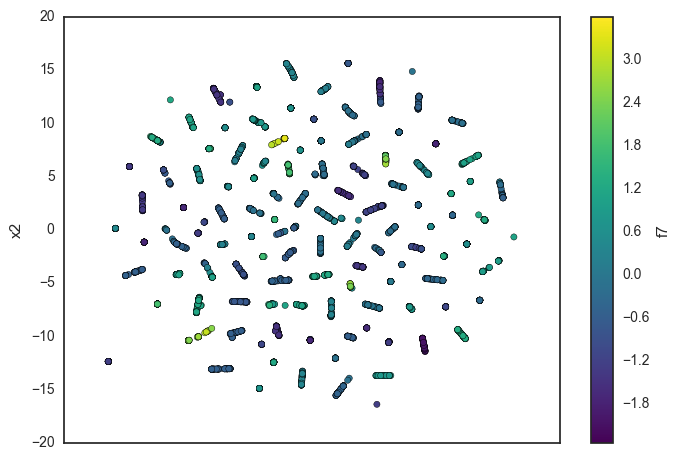

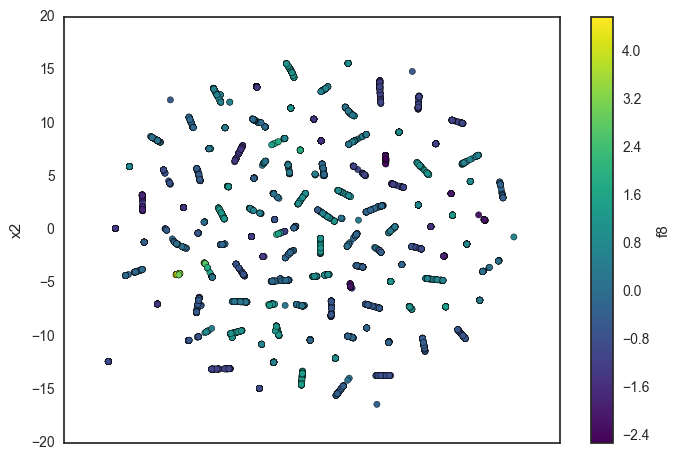

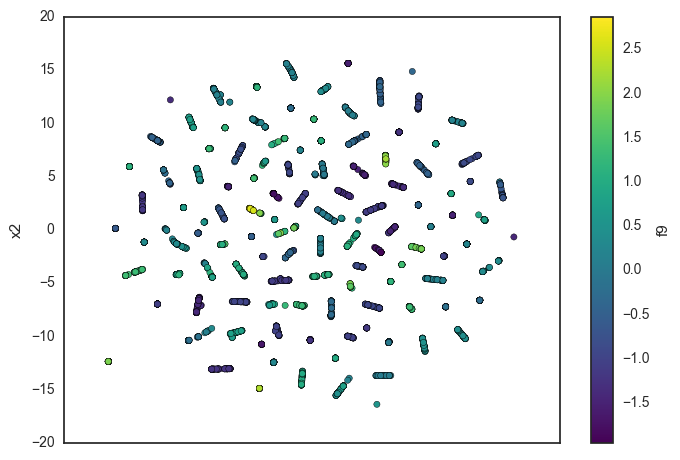

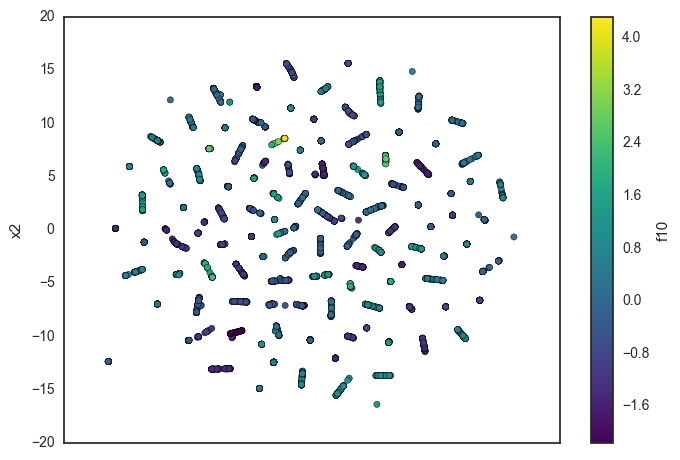

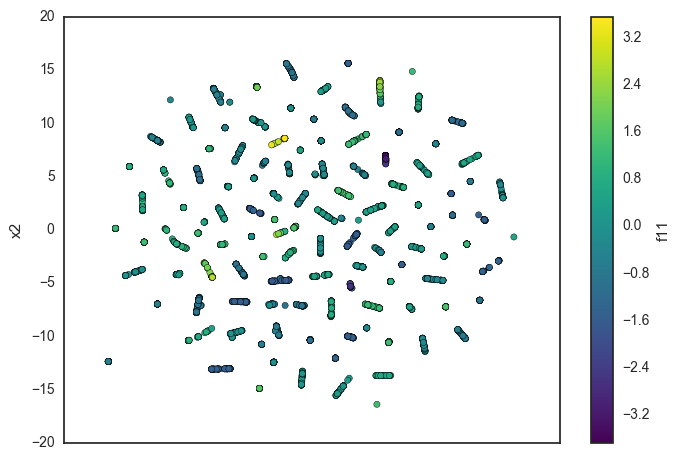

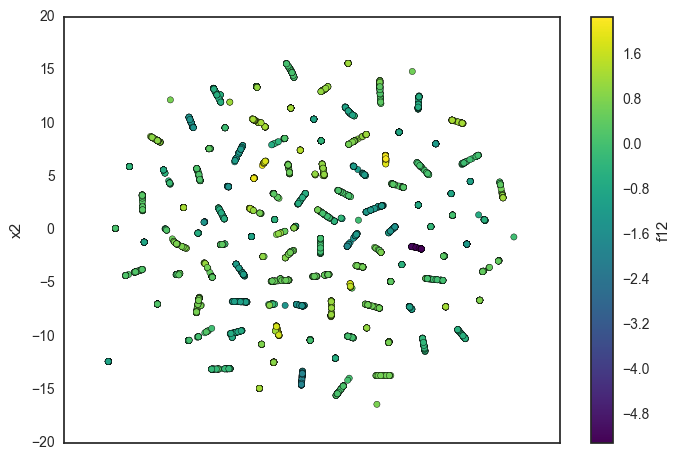

In [19]:
for i in x.columns:
    d_tsne.plot.scatter(x='x1', y='x2', c='f{}'.format(i), cmap='viridis')

<function __main__.plot_hexbin>

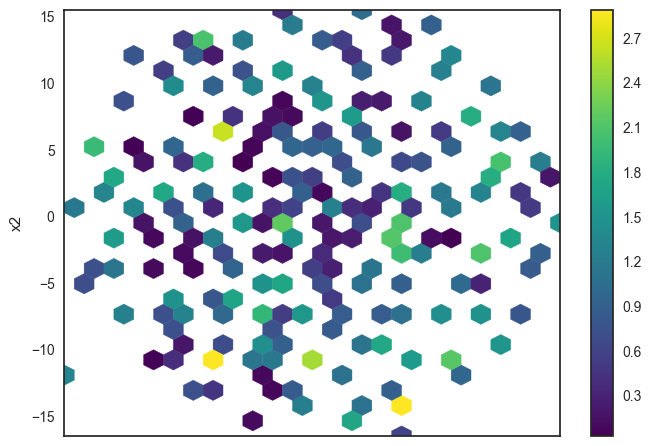

In [20]:
def plot_hexbin(gridsize, logscale, maximum):
    d_tsne.plot.hexbin(x='x1', y='x2', C='y',
                       bins='log' if logscale else None,
                       gridsize=gridsize,
                       reduce_C_function=np.max if maximum else np.mean,
                       cmap='viridis')

gridsize = widgets.IntSlider(min=10, max=100, step=5, value=25, description='grid size')
widgets.interact(plot_hexbin, gridsize=gridsize, logscale=True, maximum=True)
# assumes we are intersted in maximization

## Multi-dimensional Scaling

In [35]:
# precomputation of euclidean distances
distances = euclidean_distances(d1_notscaled)

In [36]:
# MDS fit - WARNING, takes long time to compute, 11 minutes on my PC !
import time
start = time.time()
mds = MDS(n_components=2, max_iter=30, eps=1e-9, dissimilarity="precomputed")
pos = mds.fit(distances).embedding_
print('cas: ', time.time() - start)
pos

cas:  586.7155661582947


array([[ 0.82364326, -1.394321  ],
       [ 0.42124759,  1.43835172],
       [-0.19279994, -0.84440152],
       ..., 
       [ 0.4097206 , -1.35636125],
       [-0.9307462 ,  1.33375467],
       [ 1.3082405 , -2.68749212]])

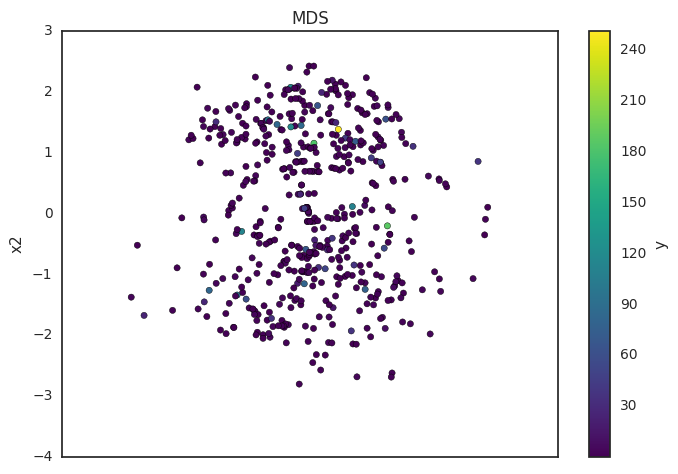

In [43]:
d = pd.concat([pd.DataFrame(pos), y_notscaled], axis=1)
d.columns = ['x1', 'x2', 'y']
ax = d.plot.scatter(x='x1', y='x2',  c='y', cmap='viridis')
ax.set(xlabel="x1", ylabel="x2")
ax.set_title('MDS')

plt.show()